In [1]:
!pip install kaggle

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fincher17","key":"66ed96c2db9ae3c74ae3bff7bd919804"}'}

In [4]:
! mkdir ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


- Download and import the Data Science Job Salary dataset.
- Identify and differentiate between structured and unstructured data within the dataset, and discuss how this impacts your analysis approach.
- Preprocess the data by handling missing values and removing duplicates if needed.
- Perform a group-wise analysis of the experience_level column, calculating the mean and median salaries for each group using Pandas’ .groupby.
- Utilize Pandas’ integration with Matplotlib to create a bar chart visualizing the average salaries for each experience level. Ensure the chart includes appropriate labels, a title, and a color scheme that enhances readability.

In [7]:
!kaggle datasets download -d milanvaddoriya/data-science-job-salary

Dataset URL: https://www.kaggle.com/datasets/milanvaddoriya/data-science-job-salary
License(s): other
  0% 0.00/9.97k [00:00<?, ?B/s]
100% 9.97k/9.97k [00:00<00:00, 15.9MB/s]


In [8]:
!unzip data-science-job-salary.zip

Archive:  data-science-job-salary.zip
  inflating: datascience_salaries.csv  


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('datascience_salaries.csv')
data.head()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary
0,0,Data scientist,Full Time,Senior,New York City,USD,149000
1,2,Data scientist,Full Time,Senior,Boston,USD,120000
2,3,Data scientist,Full Time,Senior,London,USD,68000
3,4,Data scientist,Full Time,Senior,Boston,USD,120000
4,5,Data scientist,Full Time,Senior,New York City,USD,149000


In [43]:
# Check missing and invalid values
for col in data:
  display(f'{col} {np.sum(data[col].isnull())}')
print(data['experience_level'].drop_duplicates())
print(f"Max salary {np.max(data['salary'])} Min salary: {np.min(data['salary'])}")

'Unnamed: 0 0'

'job_title 0'

'job_type 0'

'experience_level 0'

'location 0'

'salary_currency 0'

'salary 0'

0        Senior
10        Entry
19          Mid
24    Executive
Name: experience_level, dtype: object
Max salary 228000 Min salary: 30000


In [50]:
# Group by experience level and calculate mean and median salaries
aggregate_data  = (data.loc[:, ['salary', 'experience_level']].groupby(['experience_level']).mean(numeric_only=True)).rename(columns={'salary': 'Average salary'}).apply(np.floor)
aggregate_data['Median salary'] = data.loc[:, ['salary', 'experience_level']].groupby(['experience_level']).median(numeric_only=True)
aggregate_data.reset_index(inplace=True)
aggregate_data.sort_values('Average salary', inplace=True)
display(aggregate_data)

,experience_level,Average salary,Median salary
0,Entry,36111.0,30000.0
2,Mid,51786.0,51000.0
3,Senior,75088.0,68000.0
1,Executive,76076.0,46000.0


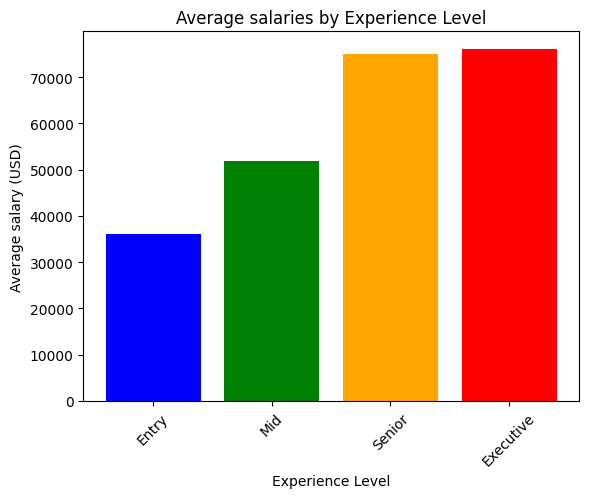

In [51]:
# Creat a plot the average salaries
plt.bar(aggregate_data['experience_level'], aggregate_data['Average salary'], color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Experience Level')
plt.ylabel('Average salary (USD)')
plt.title('Average salaries by Experience Level')
plt.xticks(rotation=45)
plt.show()

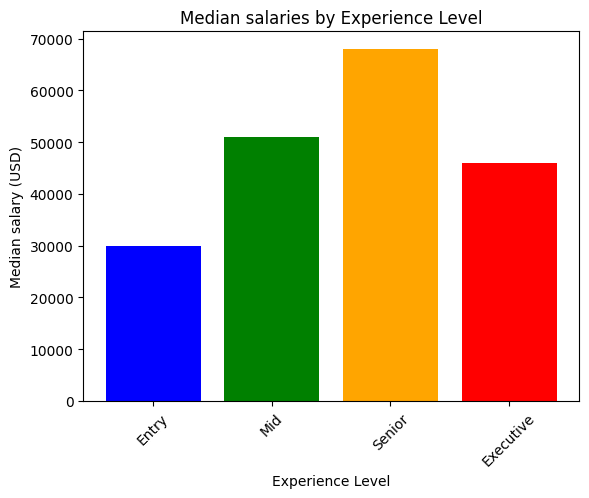

In [52]:
plt.bar(aggregate_data['experience_level'], aggregate_data['Median salary'], color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Experience Level')
plt.ylabel('Median salary (USD)')
plt.title('Median salaries by Experience Level')
plt.xticks(rotation=45)
plt.show()